## Importing required libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import json

## Loading Data 

In [4]:
fifa20 = pd.read_csv('FIFA20_official_data.csv')

In [5]:
fifa20.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,176580,L. Suárez,32,https://cdn.sofifa.com/players/176/580/20_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,89,89,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,89.0,€108.7M,57.0
1,194765,A. Griezmann,28,https://cdn.sofifa.com/players/194/765/20_60.png,France,https://cdn.sofifa.com/flags/fr.png,89,89,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,49.0,14.0,8.0,14.0,13.0,14.0,CF,89.0,€141.5M,59.0
2,212198,Bruno Fernandes,24,https://cdn.sofifa.com/players/212/198/20_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,86,89,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,55.0,12.0,14.0,15.0,8.0,14.0,CAM,87.0,€111.6M,72.0
3,192985,K. De Bruyne,28,https://cdn.sofifa.com/players/192/985/20_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/light_30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CAM,91.0,€166.5M,68.0
4,224334,M. Acuña,27,https://cdn.sofifa.com/players/224/334/20_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,82,82,Sporting CP,https://cdn.sofifa.com/teams/237/light_30.png,...,79.0,8.0,14.0,13.0,13.0,14.0,LB,82.0,€40M,79.0


In [6]:
fifa20.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Overall Rating,DefensiveAwareness
count,17104.000000,17104.000000,17104.000000,17104.000000,17104.000000,17104.000000,17104.000000,17104.000000,17085.000000,17104.000000,...,1686.000000,17104.000000,17065.000000,17104.000000,17104.000000,17104.000000,17104.000000,17104.000000,17104.000000,15418.000000
mean,222134.781279,24.171363,66.421071,72.406221,1610.653473,1.140377,2.965856,2.419843,21.663623,50.708372,...,42.951957,47.553029,45.550308,15.656688,15.519761,15.445744,15.509822,15.749474,67.126111,46.917045
std,33364.077762,4.744398,7.377895,6.093877,269.489489,0.447171,0.664766,0.775061,17.515000,18.007770,...,20.320037,21.492352,21.140214,16.743474,16.063087,15.830051,16.180544,17.008903,7.249696,20.118732
min,16.000000,16.000000,28.000000,38.000000,571.000000,1.000000,1.000000,1.000000,1.000000,6.000000,...,5.000000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,3.000000
25%,210356.500000,20.000000,61.000000,68.000000,1463.000000,1.000000,3.000000,2.000000,9.000000,39.000000,...,25.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,62.000000,30.000000
50%,230293.000000,23.000000,66.000000,72.000000,1639.000000,1.000000,3.000000,2.000000,19.000000,55.000000,...,43.000000,54.000000,51.000000,11.000000,11.000000,11.000000,11.000000,11.000000,67.000000,52.000000
75%,243580.500000,27.000000,72.000000,76.000000,1798.000000,1.000000,3.000000,3.000000,28.000000,64.000000,...,60.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,72.000000,64.000000
max,256488.000000,47.000000,94.000000,95.000000,2327.000000,5.000000,5.000000,5.000000,99.000000,94.000000,...,94.000000,93.000000,95.000000,90.000000,92.000000,93.000000,93.000000,91.000000,94.000000,94.000000


In [7]:
fifa20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17104 entries, 0 to 17103
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17104 non-null  int64  
 1   Name                      17104 non-null  object 
 2   Age                       17104 non-null  int64  
 3   Photo                     17104 non-null  object 
 4   Nationality               17104 non-null  object 
 5   Flag                      17104 non-null  object 
 6   Overall                   17104 non-null  int64  
 7   Potential                 17104 non-null  int64  
 8   Club                      16716 non-null  object 
 9   Club Logo                 17104 non-null  object 
 10  Value                     17104 non-null  object 
 11  Wage                      17104 non-null  object 
 12  Special                   17104 non-null  int64  
 13  Preferred Foot            17104 non-null  object 
 14  Intern

After applying info. function we identify that there are some null values in the data, which need to be remove before applying to the machine learning models

##  Pie Chart

In [13]:
import plotly.express as px

fig = px.pie(fifa20.head(25),names='Club',title='Percentage of Clubs in Top 25 FIFA2020 Players')
fig.show()


In [6]:

fig = px.pie(fifa20.head(25),names='Nationality',title='Percentage of Nations in Top 25 FIFA Players')
fig.show()

## Analysis of Preferred Foot through a Pie Chart

In [7]:

fig = px.pie(fifa20,names='Preferred Foot',title='Percentage of Players as per there preferred Foot')
fig.show()

## Bar Charts

In [8]:

fig = px.bar(fifa20.head(25), y='Potential',x='Name',color='Age',
             labels={'Overall Rating v Nation of Top 25'}, height=400)
fig.update_layout(title='Comparison of Potential of Top 25 FIFA Players',xaxis_title='Player Name',yaxis_title='Potential')
fig.show()

## 3D Plots

In [9]:
fig = px.scatter_3d(fifa20.head(25), x='Potential', y='Overall', z='Wage',
              color='Name')
fig.update_layout(title='3D Plot of Potential, Overall and Wage in Euros of Top 25 FIFA Players')
fig.show()

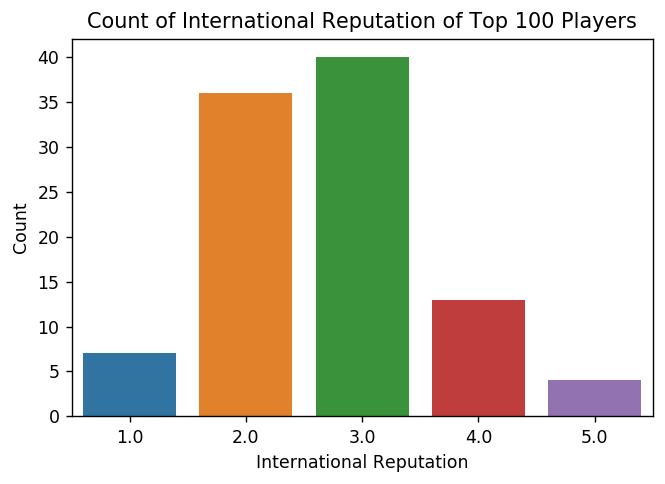

In [10]:
plt.figure(dpi=125)
sns.countplot('International Reputation',data=fifa20.head(100))
plt.xlabel('International Reputation')
plt.ylabel('Count')
plt.title('Count of International Reputation of Top 100 Players')
plt.show()

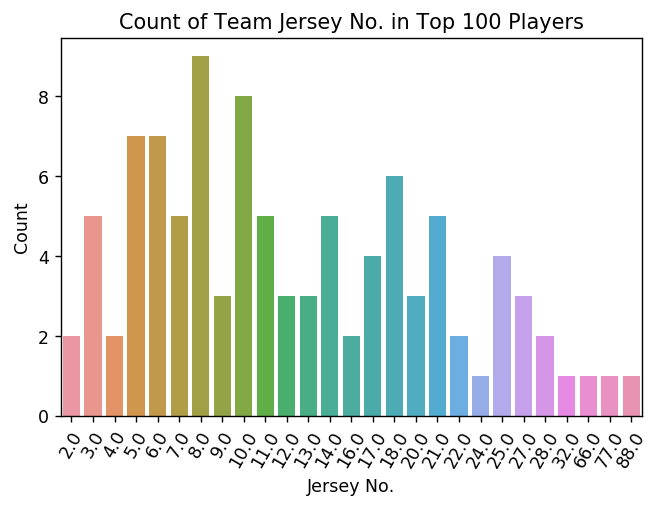

In [11]:
plt.figure(dpi=125)
sns.countplot('Jersey Number',data=fifa20.head(100))
plt.xlabel('Jersey No.')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.title('Count of Team Jersey No. in Top 100 Players')
plt.show()

In [12]:

fig = px.pie(fifa20.head(100),names='Best Position',title='Team Positions in Top 100 Players')
fig.show()

## Player's Potential

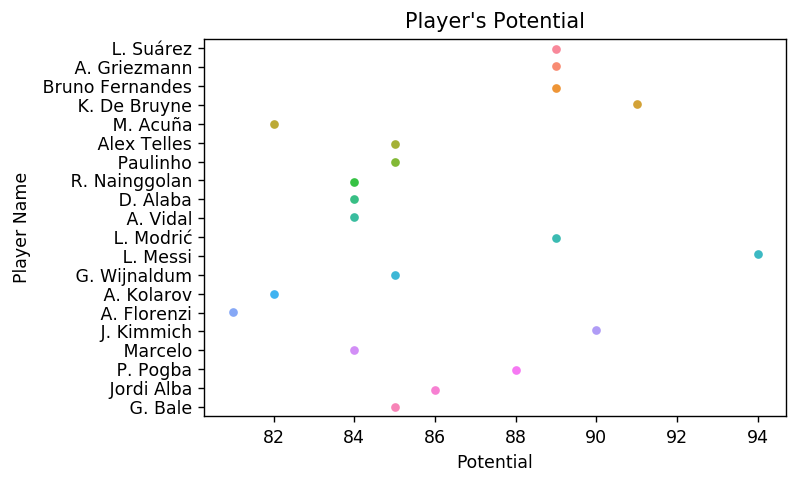

In [13]:
plt.figure(dpi=125)
sns.stripplot(x = "Potential", y = "Name", data = fifa20.head(20))
plt.xlabel('Potential')
plt.ylabel('Player Name')
plt.title('Player\'s Potential')
plt.show()


## Top 20 Clubs

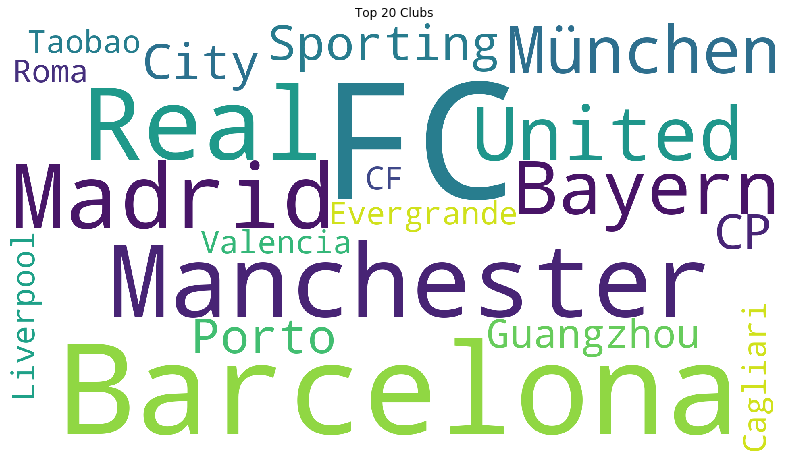

In [14]:
from wordcloud import WordCloud
plt.subplots(figsize=(20,8))
wordcloud = WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(fifa20.head(20)['Club']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 20 Clubs')
plt.savefig('cast.png')
plt.show()

## FIFA_overall

In [15]:
fifa_overall = fifa20.sort_values(['Overall'],ascending=False)[:10]
fifa_overall[['Name','Overall','Potential','Club','Preferred Foot','Position']].style.background_gradient(cmap='Blues')

,Name,Overall,Potential,Club,Preferred Foot,Position
11,L. Messi,94,94,FC Barcelona,Left,RW
21,Cristiano Ronaldo,93,93,Juventus,Right,LS
62,Neymar Jr,92,92,Paris Saint-Germain,Right,LW
3,K. De Bruyne,91,91,Manchester City,Right,RCM
13777,J. Oblak,91,93,Atlético Madrid,Right,GK
69,R. Lewandowski,91,91,FC Bayern München,Right,ST
201,V. van Dijk,91,92,Liverpool,Right,LCB
120,E. Hazard,91,91,Real Madrid,Right,SUB
161,S. Agüero,90,90,Manchester City,Right,ST
30,M. Salah,90,90,Liverpool,Left,RW


## FIFA_potential

In [16]:
fifa_potential = fifa20.sort_values(['Potential'],ascending=False)[:10]
fifa_potential[['Name','Overall','Potential','Club','Preferred Foot','Position']].style.background_gradient(cmap='Blues')

,Name,Overall,Potential,Club,Preferred Foot,Position
136,K. Mbappé,89,95,Paris Saint-Germain,Right,LS
1100,J. Sancho,86,94,Borussia Dortmund,Right,RF
11,L. Messi,94,94,FC Barcelona,Left,RW
21,Cristiano Ronaldo,93,93,Juventus,Right,LS
13777,J. Oblak,91,93,Atlético Madrid,Right,GK
529,João Félix,80,93,Atlético Madrid,Right,LS
13260,M. ter Stegen,90,93,FC Barcelona,Right,GK
570,K. Havertz,84,93,Bayer 04 Leverkusen,Left,RF
14828,G. Donnarumma,85,92,Milan,Right,GK
11234,09 L. Hoedemaker,78,92,111648,Right,SUB
